In [1]:
/# import the necessary packages
import cv2
from matplotlib import pyplot

In [2]:
image = cv2.imread('./data/Unbenannt.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]

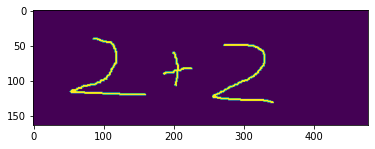

In [22]:
pyplot.imshow(thresh)

In [25]:
print(thresh.max())

255


In [32]:
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	thresh, 10, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

print(numLabels)

4


In [45]:
returnarray = []
for i in range(1, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]
	output = image.copy()
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	crop = image.copy()
	crop = crop[y-10:y+h+10, x-10:x+h+10]
	returnarray.append(crop)

[INFO] examining component 2/4
[INFO] examining component 3/4
[INFO] examining component 4/4


3


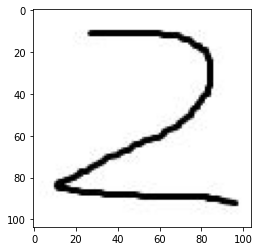

In [46]:
print(len(returnarray))
pyplot.imshow(returnarray[1])


